# DWCmod - dropwise condensation modeling
A simple python implementation of thermodynamic models for dropwise condensation.

This Jupyter notebook provides some examples for the plotting functions.
Please refer to the corresponding [GitHub repository](https://github.com/JSablowski/DWCmod) for additional information.

In [1]:
import DWC_plotting as DWC                    # import plotting functions

## Input Parameters
Defining the input parameters for the calculation. The plots below can easily be changed by adjusting the input parameters and rerunning the script. Please refer to the [CoolProp documentation](http://www.coolprop.org/fluid_properties/PurePseudoPure.html#list-of-fluids) for a list of supported fluids.

In [2]:
inputParameters = {"medium":"Water",          # choose the condensing fluid
                  "p_steam":337.8,            # pressure in mbar
                  "deltaT_sub":5,             # surface subcooling temperature in K
                  "Theta":90,                 # contact angle in deg
                  "CAH":10,                   # contact angle hysteresis in deg
                  "k_coat":0.2,               # thermal conductivity of the coating in W/(mK)
                  "delta_coat":0.000001,      # thickness of the coating in m
                  "h_i":15.7,                 # interfacial heat transfer coefficient in MW/m²K, if no value is given, h_i is calculated
                  "c":1,                      # numerical constant, "depends on the shape of the drop and on the steepness of the substrate surface" 
                  "N_s":250}                  # number of Nucleation sites in 10^9 1/m² 

## Heat flux
You can plot the heat flux vs. the surface subcooling temperature:

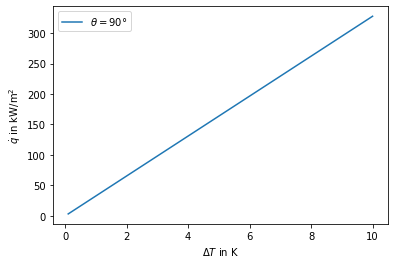

In [3]:
fig = DWC.plot_q_deltaTsub(inputParameters)

For a simple parameter variation, this function also takes some optional arguments: 

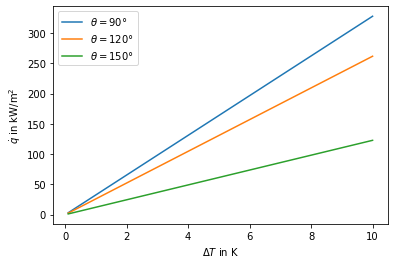

In [4]:
fig = DWC.plot_q_deltaTsub(inputParameters, theta=[90, 120, 150])  # plotting q vs. delta T for different contact angles

instead of theta = [*Value 1, Value 2, ...*] for a variation of the static contact angle, the following optional arguments are also possible:
* h_i = [*Value 1, Value 2, ...*] for a variation of interfacial heat transfer coefficients in MW/m²K
* CAH = [*Value 1, Value 2, ...*] for a variation of contact angle hystereses in deg
* N_s = [*Value 1, Value 2, ...*] for a variation of the number of nucleation sites per unit area in 10^9 1/m² 
* c = [*Value 1, Value 2, ...*]  for a variation of the numerical constant c used for calculating the capillary force between droplet and surface
* medium = [*Value 1, Value 2, ...*] for a variation of condensing fluids, names of fluids must be given as string according to the [CoolProp Docs](http://www.coolprop.org/dev/fluid_properties/PurePseudoPure.html#list-of-fluids), for example: medium=["Water", "Ammonia"] 

Additionally, the heat flux for filmwise condensation on a vertical wall can be plotted for comparison by setting ```filmwise=True```.  The height of the wall can be specified with the variable h_fw (in meter, default value: ```h_fw=0.1```. For example:


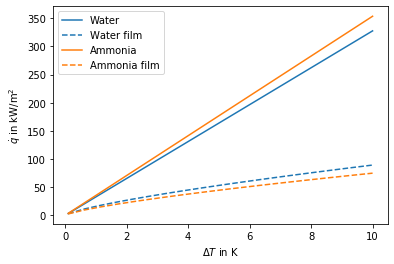

In [5]:
fig = DWC.plot_q_deltaTsub(inputParameters, medium=["Water", "Ammonia"], filmwise=True, h_fw=0.2)

## Heat transfer through single droplet
You can also plot the rate of heat flow and the heat flux through a single droplet...

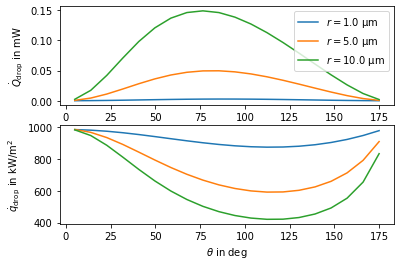

In [6]:
fig = DWC.plot_qdrop_theta_r(inputParameters, radii = [0.000001, 0.000005, 0.000010])

... and the various thermal resistances of a single droplet vs. the droplet radius:

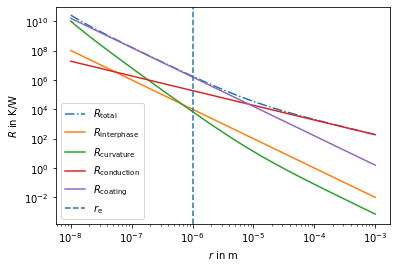

In [7]:
fig = DWC.plot_Rdrop(inputParameters)

## Drop size distribution
The drop size distribution can be plotted with the following funtion. Currently, three optional parameters are possible:
* theta = [*Value 1, Value 2, ...*] for a variation of the static contact angle
* CAH = [*Value 1, Value 2, ...*] for a variation of contact angle hystereses in deg
* N_s = [*Value 1, Value 2, ...*] for a variation of nucleation site densities in 10^9 /m²

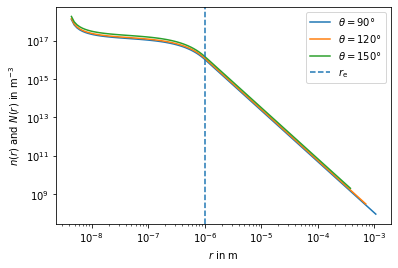

In [8]:
fig = DWC.plot_Nr_r(inputParameters, theta = [90, 120, 150])

## Results
the most important calculated values are given by the following function:

In [9]:
DWC.print_results(inputParameters)


fluid properties:
fluid: 	 Water
T_sat: 	 71.84774592128895 °C
sigma: 	 64.20573774100335 mN/m
h_fg: 	 2328.439485181256 kJ/kg
rho_l:	 976.6705040387072 kg/m³
rho_g:	 0.2137643354220767 kg/m³
R_s:	 461.52295930318655 J/(kg*K)

interfacial heat transfer coefficient:
h_i: 	  15700000.0 W/m²K
h_i_calc: 6717136.6 W/m²K

results:
q:	 163729.00061053934 W/m²
q_n:	 22174.572734600122 W/m²
q_N:	 141554.4278759392 W/m²
q_N/q:	 86.5 %
r_min:	 3.8961625003973076e-09 m
r_e:	 1e-06 m
r_max:	 0.0010561535753410094 m
misc.:	 {'Bo': 0.166455207325625, 'h_i': 15700000.0, 'k_c': 0.661171503942419}

model used:  KimKim2011
